In [225]:
import asyncio
import websockets
import json
import pandas as pd
import datetime as dt
import nest_asyncio
from concurrent.futures import ThreadPoolExecutor
nest_asyncio.apply()

import datetime
from pandas.io.json import json_normalize
import numpy as np
from scipy import interpolate
import statsmodels.api as sm

from market_data import HistData
from market_data import Options

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [226]:
hdata = HistData('ETH')

### Get Current Trading Price

In [227]:
hdata.get_idx_price()

2303.34

### Get Available Timeframes

In [228]:
hdata.get_timeframes()

{'1min': 1,
 '3min': 3,
 '5min': 5,
 '10min': 10,
 '15min': 15,
 '30min': 30,
 '1hr': 60,
 '2hr': '120',
 '3hr': 180,
 '6hr': 360,
 '12hr': 720,
 '1d': '1D'}

### Get Historical Data

In [229]:
start = int(pd.to_datetime('20230101').timestamp()*1000)
end = int(pd.datetime.today().timestamp()*1000)
timeframe = 60
df = hdata.retrieve_hist_data(start,end,'ETH-PERPETUAL',timeframe)
df

C:\Users\kmavy\AppData\Local\Temp\ipykernel_28960\2033883223.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,ticks,volume,cost,status,open,low,high,close
timestamp,,,,,,,,
2023-07-11 09:00:00,1.689037e+09,156.587227,295034.0,ok,1880.05,1880.05,1885.85,1884.25
2023-07-11 10:00:00,1.689041e+09,161.118751,303375.0,ok,1884.40,1879.15,1884.40,1879.15
2023-07-11 11:00:00,1.689044e+09,58.584956,110036.0,ok,1880.05,1877.85,1880.05,1879.70
2023-07-11 12:00:00,1.689048e+09,116.799906,219760.0,ok,1880.85,1879.80,1881.70,1879.80
2023-07-11 13:00:00,1.689052e+09,35.184519,66125.0,ok,1879.15,1879.00,1879.85,1879.00
...,...,...,...,...,...,...,...,...
2024-02-04 13:00:00,1.707023e+09,434.716017,999606.0,ok,2297.40,2296.90,2302.20,2300.05
2024-02-04 14:00:00,1.707026e+09,728.699428,1673187.0,ok,2300.10,2286.25,2300.65,2288.35
2024-02-04 15:00:00,1.707030e+09,719.563111,1647122.0,ok,2288.30,2264.75,2292.35,2290.30


## Options

In [230]:
opt = Options('ETH')

## Get all active Eth options

In [231]:
eth_active_options = opt.get_all_active_options()
eth_active_options

648 active options.


,tick_size_steps,quote_currency,min_trade_amount,expiration_timestamp,counter_currency,settlement_period,settlement_currency,block_trade_tick_size,block_trade_min_trade_amount,block_trade_commission,...,instrument_type,taker_commission,maker_commission,strike,is_active,kind,rfq,price_index,creation_date,expiration_date
instrument_name,,,,,,,,,,,,,,,,,,,,,
ETH-5FEB24-1950-C,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,1950.0,True,option,False,eth_usd,2024-02-02 08:13:00,2024-02-05 08:00:00
ETH-5FEB24-1950-P,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,1950.0,True,option,False,eth_usd,2024-02-02 08:13:00,2024-02-05 08:00:00
ETH-5FEB24-2000-C,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,2000.0,True,option,False,eth_usd,2024-02-02 08:01:00,2024-02-05 08:00:00
ETH-5FEB24-2000-P,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,2000.0,True,option,False,eth_usd,2024-02-02 08:01:00,2024-02-05 08:00:00
ETH-5FEB24-2050-C,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,2050.0,True,option,False,eth_usd,2024-02-02 08:01:00,2024-02-05 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ETH-27DEC24-8500-P,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1735286400000,USD,month,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,8500.0,True,option,False,eth_usd,2023-12-28 08:01:00,2024-12-27 08:00:00
ETH-27DEC24-9000-C,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1735286400000,USD,month,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,9000.0,True,option,False,eth_usd,2024-01-10 21:14:00,2024-12-27 08:00:00
ETH-27DEC24-9000-P,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1735286400000,USD,month,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,9000.0,True,option,False,eth_usd,2024-01-10 21:14:00,2024-12-27 08:00:00


### Get actively traded option chains

In [232]:
option_chain_mar = opt.get_option_chain('20240301',option_type='call')
option_chain_dec = opt.get_option_chain('20241201',option_type='call')

648 active options.
1710979200000
Expiration Date:  2024-03-29 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1734739200000
Expiration Date:  2024-12-27 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

In [233]:
option_chain_mar

,estimated_delivery_price,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_index,underlying_price,mark_iv,best_bid_price,best_ask_price,...,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high,strike,expiration_date
0,2303.40,345.0,345.0,0.00,325.82,ETH-29MAR24,2326.05,160.21,0.9100,0.9170,...,0.00036,0.00000,0.99999,0.00,0.0,NaN,NaN,NaN,200,2024-03-29 16:00:00
0,2303.40,345.0,345.0,0.00,223.56,ETH-29MAR24,2326.05,158.54,0.8235,0.8305,...,0.02174,0.00000,0.99930,0.00,0.0,NaN,NaN,NaN,400,2024-03-29 16:00:00
0,2303.40,345.0,345.0,0.00,195.32,ETH-29MAR24,2326.05,133.66,0.7800,0.7875,...,0.01818,0.00000,0.99942,0.00,0.0,NaN,NaN,NaN,500,2024-03-29 16:00:00
0,2303.40,345.0,345.0,0.00,172.65,ETH-29MAR24,2326.06,123.88,0.7370,0.7445,...,0.03069,0.00000,0.99898,0.00,0.0,NaN,NaN,NaN,600,2024-03-29 16:00:00
0,2303.40,345.0,345.0,0.00,148.86,ETH-29MAR24,2326.06,102.70,0.6525,0.6600,...,0.05304,0.00001,0.99814,0.00,0.0,NaN,NaN,NaN,800,2024-03-29 16:00:00
0,2303.40,345.0,345.0,0.00,122.60,ETH-29MAR24,2326.06,86.10,0.5660,0.5745,...,0.08914,0.00001,0.99670,0.00,0.0,NaN,NaN,NaN,1000,2024-03-29 16:00:00
0,2303.40,345.0,345.0,0.00,100.72,ETH-29MAR24,2326.05,73.66,0.4795,0.4890,...,0.16501,0.00003,0.99342,0.00,0.0,NaN,NaN,NaN,1200,2024-03-29 16:00:00
0,2303.40,345.0,429.0,0.00,83.19,ETH-29MAR24,2326.05,65.04,0.3940,0.4040,...,0.34907,0.00007,0.98446,0.00,0.0,NaN,NaN,NaN,1400,2024-03-29 16:00:00
0,2303.40,345.0,424.0,0.00,74.90,ETH-29MAR24,2326.06,60.80,0.3510,0.3615,...,0.48826,0.00010,0.97694,0.00,0.0,NaN,NaN,NaN,1500,2024-03-29 16:00:00
0,2303.40,345.0,345.0,0.00,67.98,ETH-29MAR24,2326.06,57.17,0.3085,0.3195,...,0.68969,0.00015,0.96507,0.00,0.0,NaN,NaN,NaN,1600,2024-03-29 16:00:00


### Option IV profile

<Axes: title={'center': 'Mar24 ETH Call Option IV Profile'}, xlabel='strike'>

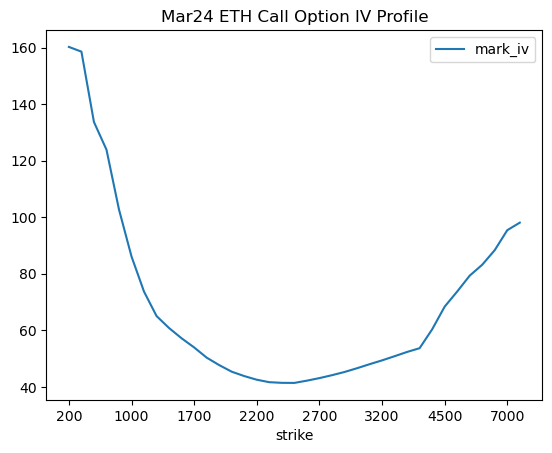

In [234]:
option_chain_mar[['strike','mark_iv']].set_index('strike').plot(title = 'Mar24 ETH Call Option IV Profile')
#option_chain_dec[['strike','mark_iv']].set_index('strike').plot()

### Option Implied Volatility Surface

In [239]:
mths = np.arange(0,10,1)
first_date = pd.to_datetime('20240101')
target_dates = [first_date +datetime.timedelta(days = 30*int(mth)) for mth in mths]
full_opt_chain = pd.DataFrame()
for target_date in target_dates:
    full_opt_chain = pd.concat([full_opt_chain,opt.get_option_chain(target_expiry=target_date,option_type='call')])


iv_surface = full_opt_chain[['expiration_date','strike','mark_iv']]
iv_surface['expiration_date'] = [dt.strftime('%Y%m%d') for dt in iv_surface['expiration_date']]
iv_surface = iv_surface.fillna(method = 'ffill').fillna(method = 'bfill')
#iv_surface['expiration_date']=iv_surface['expiration_date'].astype(int)
#iv_surface = pd.pivot_table(iv_surface,index = 'strike',columns ='strike' ,aggfunc='mean').fillna(method ='bfill').fillna(method ='ffill')



648 active options.
1705795200000
Expiration Date:  2024-02-05 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1708387200000
Expiration Date:  2024-02-23 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1710979200000
Expiration Date:  2024-03-29 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1713571200000
Expiration Date:  2024-04-26 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1716163200000
Expiration Date:  2024-06-28 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1718755200000
Expiration Date:  2024-06-28 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1721347200000
Expiration Date:  2024-09-27 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1723939200000
Expiration Date:  2024-09-27 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1726531200000
Expiration Date:  2024-09-27 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

648 active options.
1729123200000
Expiration Date:  2024-12-27 16:00:00


c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.

c:\Users\kmavy\Documents\mydocs\Training Arc\Github\QuantMasterFund\Crypto\Volatility\market_data.py:159: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_norma

In [240]:
import plotly.express as px

#iv_surface = iv_surface.apply(pd.to_numeric,axis=1)

fig = px.scatter_3d(iv_surface, x='expiration_date', y='strike', z='mark_iv',color = 'mark_iv',
                    size_max = 2)
fig.show()

### Option Delta Profile

<Axes: title={'center': 'Mar24 ETH Call Option Delta'}, xlabel='strike'>

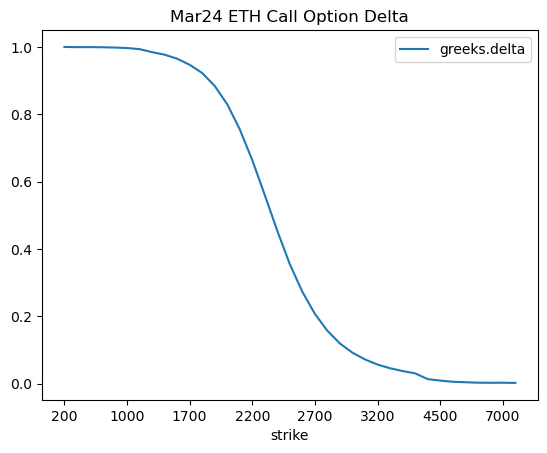

In [236]:
option_chain_mar[['strike','greeks.delta']].set_index('strike').plot(title = 'Mar24 ETH Call Option Delta')

### Option Vega Profile

<Axes: title={'center': 'Mar24 ETH Call Option Vega'}, xlabel='strike'>

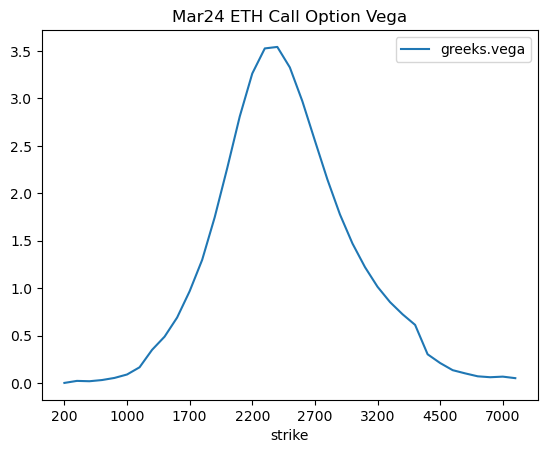

In [237]:
option_chain_mar[['strike','greeks.vega']].set_index('strike').plot(title = 'Mar24 ETH Call Option Vega')

### Option Gamma Profle

<Axes: title={'center': 'Mar24 ETH Call Option Gamma'}, xlabel='strike'>

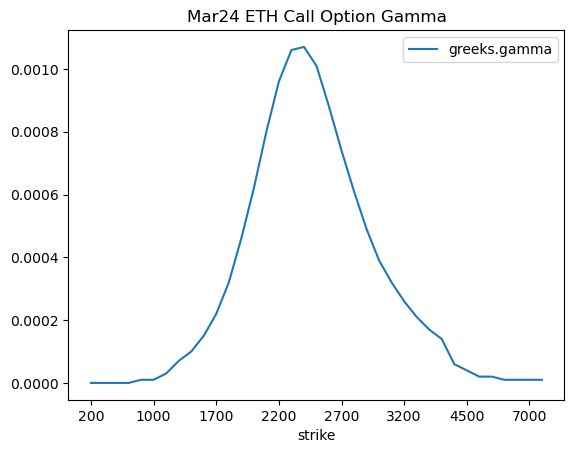

In [238]:
option_chain_mar[['strike','greeks.gamma']].set_index('strike').plot(title = 'Mar24 ETH Call Option Gamma')